In [58]:
! pip install ucimlrepo

In [59]:
from ucimlrepo import fetch_ucirepo 
  
heart_disease = fetch_ucirepo(id=45) 
  
x = heart_disease.data.features 
y = heart_disease.data.targets 
  
print(heart_disease.metadata) 
  
print(heart_disease.variables) 

{'uci_id': 45, 'name': 'Heart Disease', 'repository_url': 'https://archive.ics.uci.edu/dataset/45/heart+disease', 'data_url': 'https://archive.ics.uci.edu/static/public/45/data.csv', 'abstract': '4 databases: Cleveland, Hungary, Switzerland, and the VA Long Beach', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 303, 'num_features': 13, 'feature_types': ['Categorical', 'Integer', 'Real'], 'demographics': ['Age', 'Sex'], 'target_col': ['num'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1989, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C52P4X', 'creators': ['Andras Janosi', 'William Steinbrunn', 'Matthias Pfisterer', 'Robert Detrano'], 'intro_paper': {'ID': 231, 'type': 'NATIVE', 'title': 'International application of a new probability algorithm for the diagnosis of coronary artery disease.', 'authors': 'R. Detrano, A. Jánosi, W. Steinbrunn, M

In [60]:
import pandas as pd

x = pd.DataFrame(x)
y = pd.DataFrame(y)

In [61]:
y = y.rename(columns={'num': 'condition'})   
data = pd.concat([x, y], axis=1)

In [62]:
data.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [63]:
data.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
302,38,1,3,138,175,0,0,173,0,0.0,1,NaN,3.0,0


In [64]:
data.to_csv('../data/heart_disease.csv', index=False)

In [65]:
loaded_data = pd.read_csv('../data/heart_disease.csv')
loaded_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,45,1,1,110,264,0,0,132,0,1.2,2,0.0,7.0,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2.0,7.0,2
300,57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
301,57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1


In [66]:
!conda install numpy -y
!conda install scikit-learn -y


2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [67]:
import numpy as np
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy='median')

df = pd.DataFrame(
    imputer.fit_transform(loaded_data),
    columns=loaded_data.columns
)

df = df.astype(loaded_data.dtypes.to_dict())

df[['ca', 'thal']] = df[['ca', 'thal']].astype(int)
df['condition'] = df['condition'].apply(lambda x: 1 if x > 1 else x)

In [68]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,63,1,1,145,233,1,2,150,0,2.3,3,0,6,0
1,67,1,4,160,286,0,2,108,1,1.5,2,3,3,1
2,67,1,4,120,229,0,2,129,1,2.6,2,2,7,1
3,37,1,3,130,250,0,0,187,0,3.5,3,0,3,0
4,41,0,2,130,204,0,2,172,0,1.4,1,0,3,0


In [69]:
df.tail(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
298,45,1,1,110,264,0,0,132,0,1.2,2,0,7,1
299,68,1,4,144,193,1,0,141,0,3.4,2,2,7,1
300,57,1,4,130,131,0,0,115,1,1.2,2,1,7,1
301,57,0,2,130,236,0,2,174,0,0.0,2,1,3,1
302,38,1,3,138,175,0,0,173,0,0.0,1,0,3,0


In [70]:
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler

df['condition'] = df['condition'].apply(lambda x: 1 if x > 1 else x)

categorical_cols = ['sex', 'cp', 'restecg', 'slope', 'ca', 'thal', 'fbs', 'exang']

ohe = OneHotEncoder(sparse_output=False)

encoded = ohe.fit_transform(df[categorical_cols])

encoded_df = pd.DataFrame(encoded, columns=ohe.get_feature_names_out(categorical_cols), index=df.index)

df = df.drop(columns=categorical_cols).join(encoded_df)

In [71]:
df.tail(5)

,age,trestbps,chol,thalach,oldpeak,condition,sex_0,sex_1,cp_1,cp_2,...,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7,fbs_0,fbs_1,exang_0,exang_1
298,45,110,264,132,1.2,1,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
299,68,144,193,141,3.4,1,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
300,57,130,131,115,1.2,1,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
301,57,130,236,174,0.0,1,1.0,0.0,0.0,1.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
302,38,138,175,173,0.0,0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [72]:
print(df.shape)

(303, 29)


In [73]:
scaler = MinMaxScaler()

features = df.drop(columns=['condition'])

scaled_df = scaler.fit_transform(features)

scaled_df = pd.DataFrame(scaled_df, columns=features.columns)

scaled_df

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,ca_1,ca_2,ca_3,thal_3,thal_6,thal_7,fbs_0,fbs_1,exang_0,exang_1
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
1,0.791667,0.622642,0.365297,0.282443,0.241935,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
4,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
299,0.812500,0.471698,0.152968,0.534351,0.548387,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
300,0.583333,0.339623,0.011416,0.335878,0.193548,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0
301,0.583333,0.339623,0.251142,0.786260,0.000000,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [74]:
preprocessed_data = pd.concat([scaled_df, df['condition']], axis=1)
preprocessed_data

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_1,cp_2,cp_3,...,ca_2,ca_3,thal_3,thal_6,thal_7,fbs_0,fbs_1,exang_0,exang_1,condition
0,0.708333,0.481132,0.244292,0.603053,0.370968,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0
1,0.791667,0.622642,0.365297,0.282443,0.241935,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,1
2,0.791667,0.245283,0.235160,0.442748,0.419355,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
3,0.166667,0.339623,0.283105,0.885496,0.564516,0.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
4,0.250000,0.339623,0.178082,0.770992,0.225806,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,0.333333,0.150943,0.315068,0.465649,0.193548,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1
299,0.812500,0.471698,0.152968,0.534351,0.548387,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1
300,0.583333,0.339623,0.011416,0.335878,0.193548,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1
301,0.583333,0.339623,0.251142,0.786260,0.000000,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1


In [75]:
!conda install matplotlib -y

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



In [76]:
!conda install seaborn -y

2 channel Terms of Service accepted
Channels:
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.5.1
    latest version: 25.7.0

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



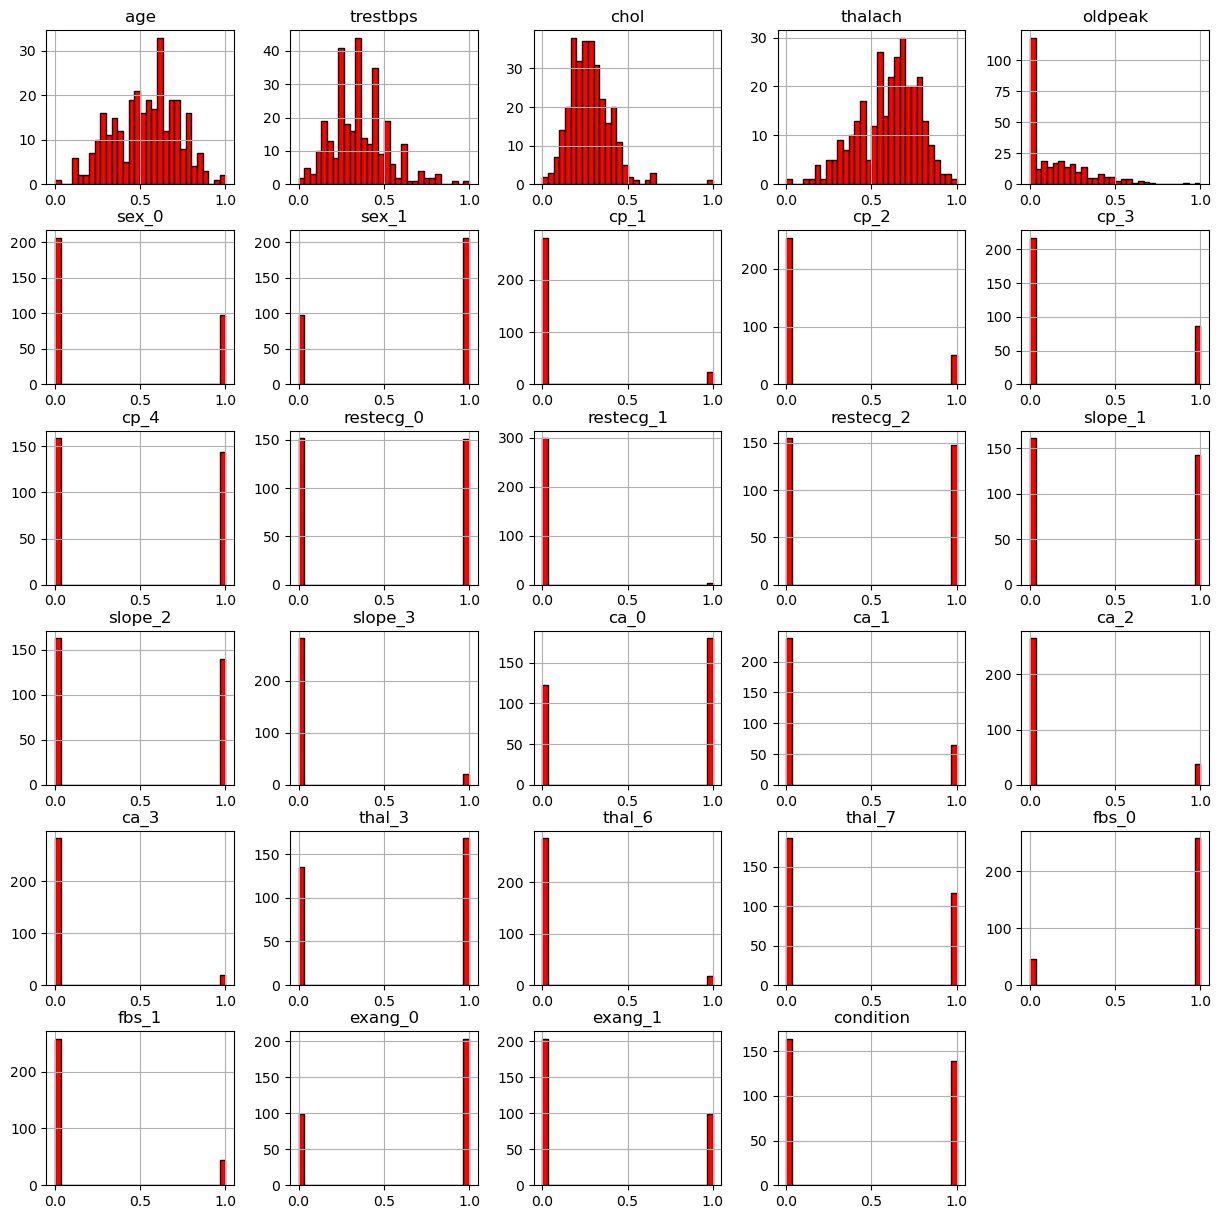

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

preprocessed_data.hist(bins=30, edgecolor='black', color='red', figsize=(15,15))
plt.show()

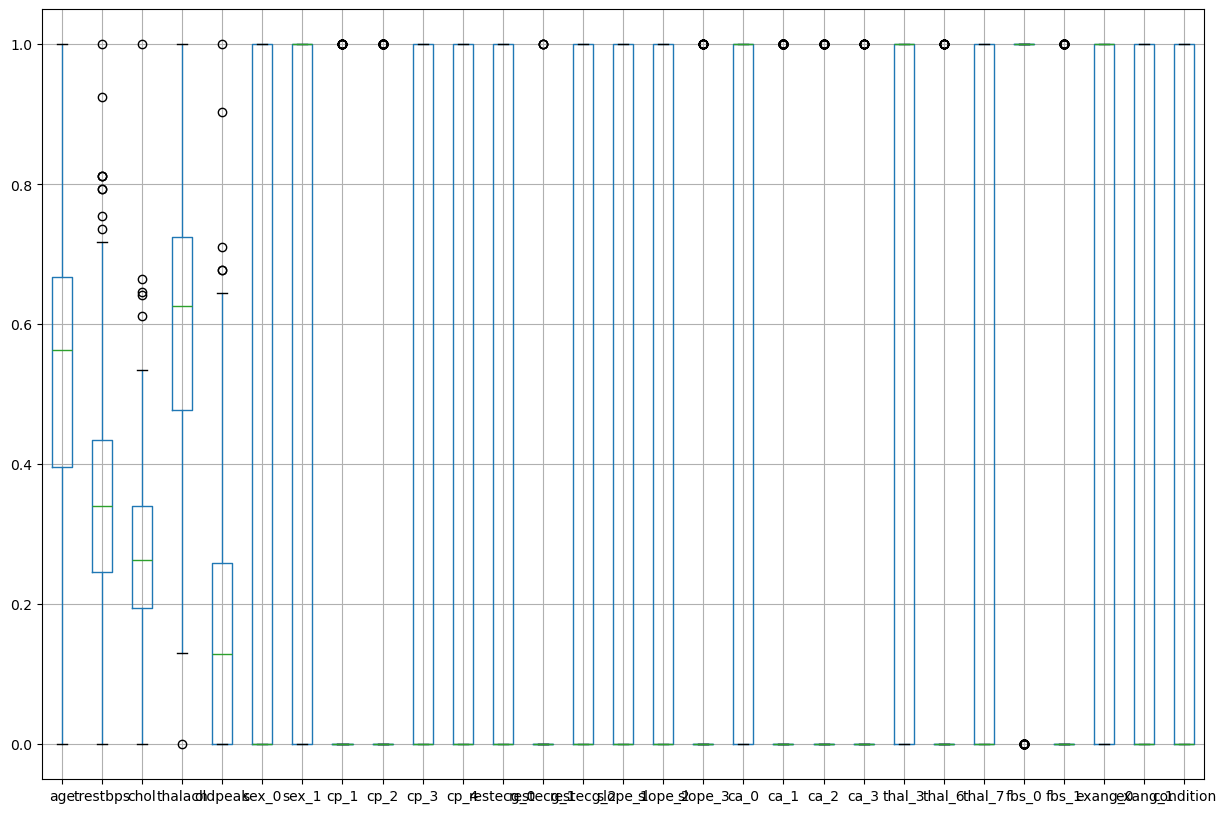

In [78]:
preprocessed_data.boxplot(figsize=(15,10))
plt.show()

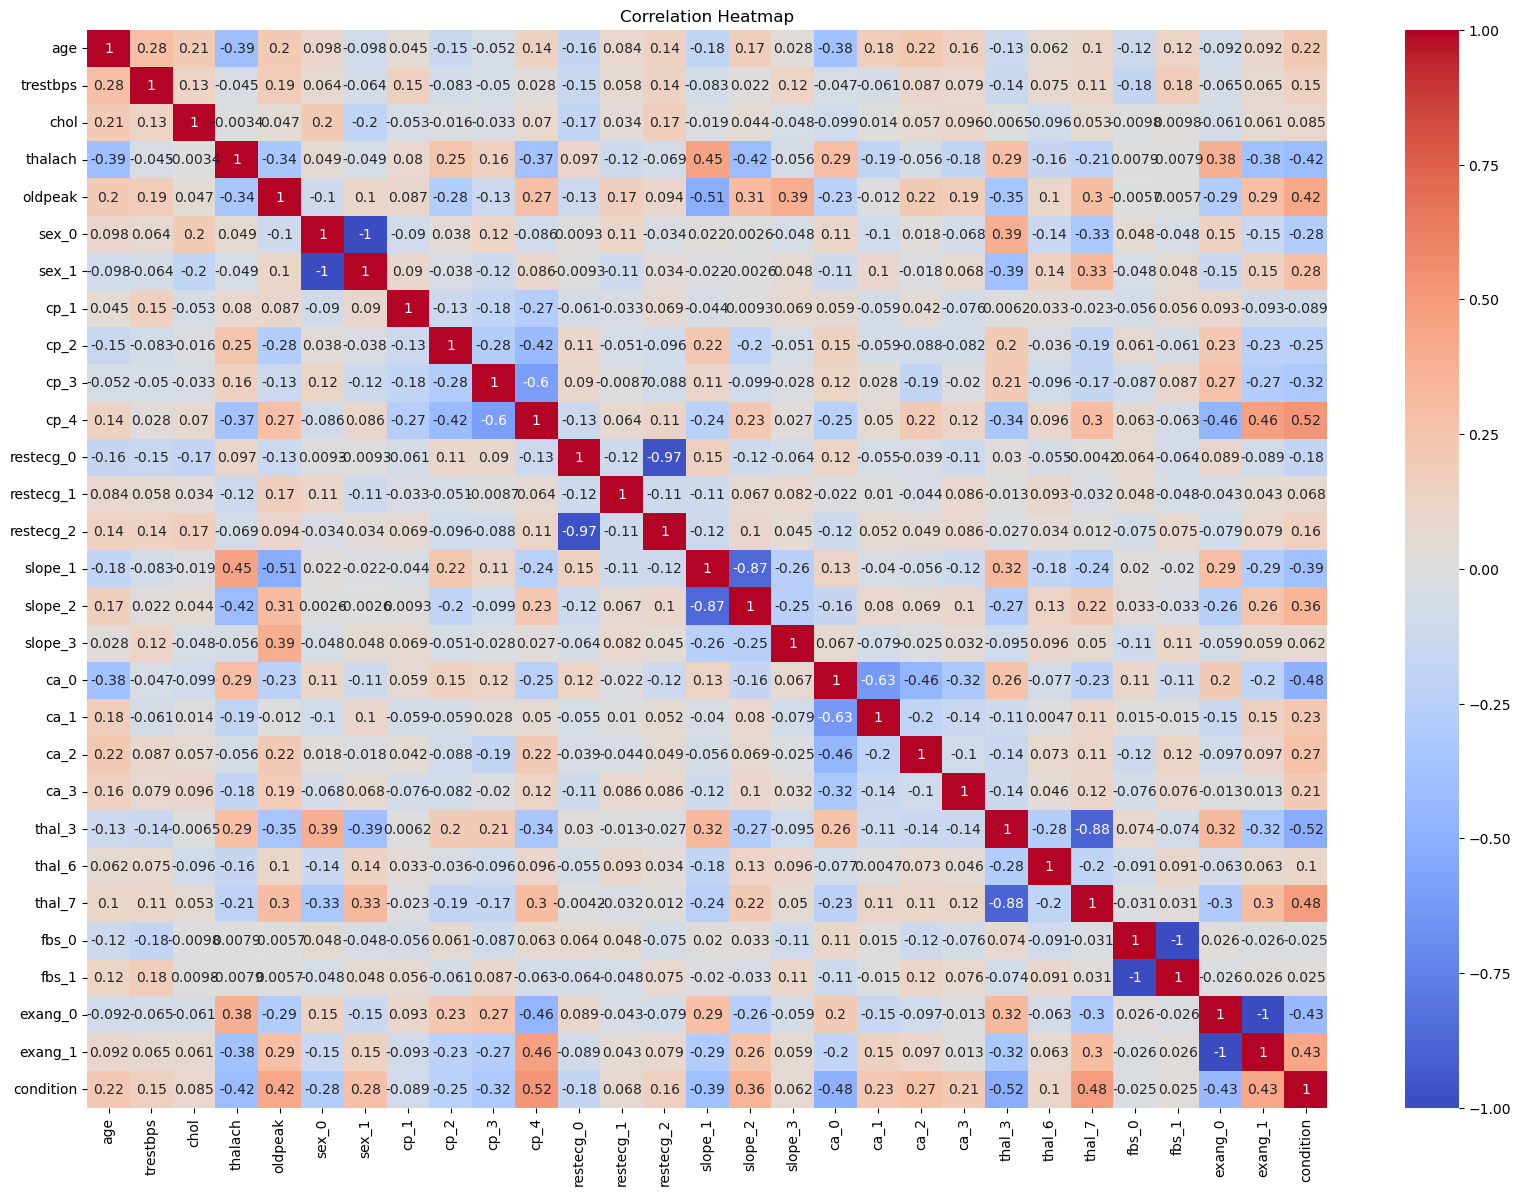

In [79]:
plt.figure(figsize=(20,14))
corr = preprocessed_data.select_dtypes('number').corr()
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title('Correlation Heatmap')
plt.show()

In [80]:
preprocessed_data.to_csv('../data/preprocessed_heart_disease.csv', index=False)

In [81]:
import joblib

joblib.dump(ohe, "../models/onehot_encoder.pkl")
joblib.dump(scaler, "../models/minmax_scaler.pkl")

['../models/minmax_scaler.pkl']